# Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

# ANSWER 1 .

In [27]:
def count_highest_frequency(string):
    d={}
    l=[]
    for i in string.split(' '):
        d[len(str(i))]=string.split(' ').count(i)
    return max(d)

In [28]:
count_highest_frequency("writes writes writes all the number from from from 1 to 100")

6

In [29]:
count_highest_frequency("I I I am a studen studen studen of Inueron Inueron Inueron")

7

In [31]:
count_highest_frequency("the are three 10 10 10 three 100 100 100 and no 10000 10000 10000 in 1 to 100")

5

# Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

# ANSWER 3 .

In [6]:
import requests
import json
import pandas as pd

In [28]:
def fetch_from_url_to_excel(link):
    response=requests.get(link)
    if response.status_code==200:
        with open("sample.json","wb") as file:
            file.write(response.content)
            file.close()
        with open('sample.json',"rb") as file:
            data=json.load(file)
            df=pd.DataFrame(data['pokemon'])
            file.close()
        df.to_excel('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning\\pokemon.xlsx',index=False,header=True)
        
    

In [29]:
fetch_from_url('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')
        

# Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

# ANSWER 4 .

In [73]:
def fetch_from_url_to_csv(link):
    response=requests.get(link)
    if response.status_code==200:
        with open("sample.json","wb") as file:
            file.write(response.content)
            file.close()
        with open('sample.json',"rb") as file:
            data=json.load(file)
            df=pd.DataFrame(data)
            df.drop(columns=[':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],axis=1,inplace=True)
            df.dropna(inplace=True)
            df['year'] = pd.to_datetime(df['year'], errors='coerce')
            file.close()
        df.to_csv('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning\\sample.csv',header=True,index=False)

In [74]:
fetch_from_url_to_csv('https://data.nasa.gov/resource/y77d-th95.json')


# Question 5 -
Write a program to download the data from the given API link and then extract the following data with
proper formatting
Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

# ANSWER 5 .

In [110]:
def fetch_from_api_to_csv(link):
    response=requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
    if response.status_code==200:
        with open("sample.json1","wb") as file:
            file.write(response.content)
            file.close()
        with open('sample.json1',"rb") as file:
            data=json.load(file)
            df=pd.DataFrame(data['_embedded']['episodes'])
            df['airdate']=pd.to_datetime(df['airdate'])
            df['airtime'] = pd.to_datetime(df['airtime']).dt.strftime('%H:%M')

            file.close()
        df.to_csv('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning\\season_description.csv',header=True,index=False)

In [111]:
fetch_from_api_to_csv('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')

# Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.


# ANSWER 6 .

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns


In [113]:
df=pd.read_excel('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning\\pokemon.xlsx')

1. Get all Pokemons whose spawn rate is less than 5%

In [262]:
total_spawn_rate=df['spawn_chance'].count()

In [265]:
spawn_less_than_5percent=df['spawn_chance'][df['spawn_chance']<0.05].count()
spawn_less_than_5percent

65

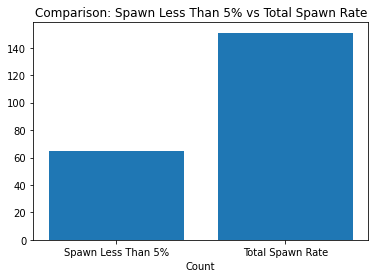

In [268]:

spawn_less_than_5percent = 65
total_spawn_rate = 151


labels = ['Spawn Less Than 5%', 'Total Spawn Rate']
values = [spawn_less_than_5percent, total_spawn_rate]

plt.bar(labels, values)


plt.xlabel('Count')
plt.title('Comparison: Spawn Less Than 5% vs Total Spawn Rate')


plt.show()

out of 151, 65 has less spawn rate than 5 percent

2. Get all Pokemons that have less than 4 weaknesses

In [163]:
df['weaknesses']=df['weaknesses'].apply(lambda x: eval(x))

    

In [269]:
total_weakness=df['weaknesses'].count()

In [270]:
def less_than_4_weakness(x):
    if len(x)<4:
        return x

In [271]:
less_than_4_weakness=df['weaknesses'].apply(less_than_4_weakness).count()

In [273]:
print("Pokemons that have less than 4 weaknesses are",less_than_4_weakness)

Pokemons that have less than 4 weaknesses are 102


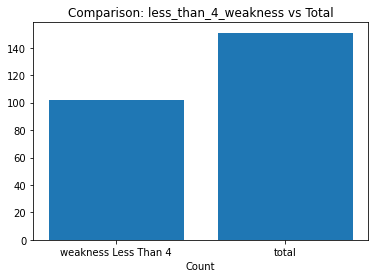

In [275]:

less_than_4_weakness= 102
total = 151


labels = ['weakness Less Than 4', 'total']
values = [less_than_4_weakness, total]

plt.bar(labels, values)


plt.xlabel('Count')
plt.title('Comparison: less_than_4_weakness vs Total')

plt.show()

3. Get all Pokemons that have no multipliers at all

In [206]:
df['multipliers'].isnull().sum()

81

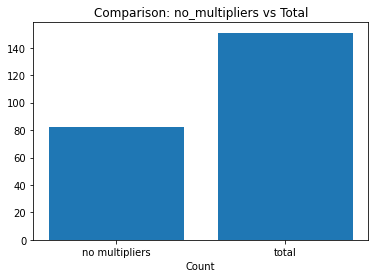

In [276]:

no_multipliers= 82
total = 151


labels = ['no multipliers', 'total']
values = [no_multipliers, total]

plt.bar(labels, values)


plt.xlabel('Count')
plt.title('Comparison: no_multipliers vs Total')

plt.show()

81 have no multipliers at all i.e NaN values

4. Get all Pokemons that do not have more than 2 evolutions

In [217]:
df['next_evolution'].isnull().sum()

81

In [220]:
df['next_evolution'].dropna().apply(lambda x:eval(x)).apply(less_than_2_evolutions)

0      [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...
1                   [{'num': '003', 'name': 'Venusaur'}]
3      [{'num': '005', 'name': 'Charmeleon'}, {'num':...
4                  [{'num': '006', 'name': 'Charizard'}]
6      [{'num': '008', 'name': 'Wartortle'}, {'num': ...
                             ...                        
132                                                 None
137                  [{'num': '139', 'name': 'Omastar'}]
139                 [{'num': '141', 'name': 'Kabutops'}]
146    [{'num': '148', 'name': 'Dragonair'}, {'num': ...
147                [{'num': '149', 'name': 'Dragonite'}]
Name: next_evolution, Length: 70, dtype: object

In [219]:
def less_than_2_evolutions(x):
    if len(x)<=2:
        return x

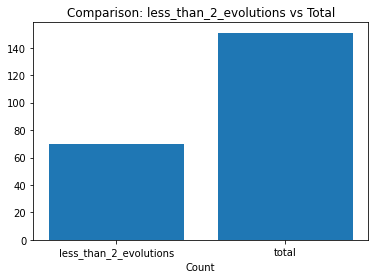

In [277]:

less_than_2_evolutions= 70
total = 151


labels = ['less_than_2_evolutions', 'total']
values = [less_than_2_evolutions, total]

plt.bar(labels, values)


plt.xlabel('Count')
plt.title('Comparison: less_than_2_evolutions vs Total')

plt.show()

70 has less than 2 evolution

5. Get all Pokemons whose spawn time is less than 300 seconds

In [246]:
df['spawn_time'].dropna().apply(total_spawn_seconds)[df['spawn_time'].dropna().apply(total_spawn_seconds)<300].count()

75

In [237]:
def total_spawn_seconds(x):
    return int(x.split(":")[0])*60 + int(x.split(":")[1])

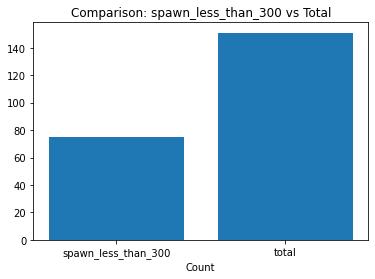

In [278]:
spawn_less_than_300= 75
total = 151


labels = ['spawn_less_than_300', 'total']
values = [spawn_less_than_300, total]

plt.bar(labels, values)


plt.xlabel('Count')
plt.title('Comparison: spawn_less_than_300 vs Total')

plt.show()

75 Pokemons has spawn time less than 300 seconds

6.  Get all Pokemon who have more than two types of capabilities

In [255]:
df['type'].apply(lambda x:eval(x)).apply(more_than_2_capabilities).count()

0

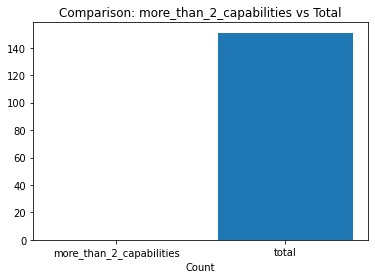

In [279]:
more_than_2_capabilities= 0
total = 151


labels = ['more_than_2_capabilities', 'total']
values = [more_than_2_capabilities, total]

plt.bar(labels, values)


plt.xlabel('Count')
plt.title('Comparison: more_than_2_capabilities vs Total')

plt.show()

In [253]:
def more_than_2_capabilities(x):
    if len(x)>2:
        return x

None of the pokemons has more than 2 capabilities

# Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

● Get all the Earth meteorites that fell before the year 2000

# Answer 7 .

In [280]:
df=pd.read_csv('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning\\sample.csv')

In [296]:
meteors_before_2000=pd.to_datetime(df['year'])[pd.to_datetime(df['year']).dt.year<2000].count()
meteors_before_2000

882

In [289]:
df.year.count()

948

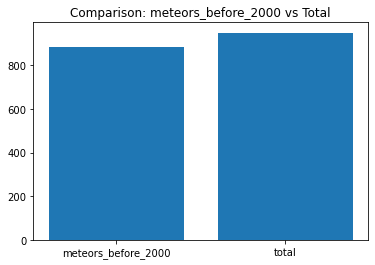

In [329]:
meteors_before_2000 =882 
total = 948

labels = ['meteors_before_2000', 'total']
values = [meteors_before_2000, total]


plt.bar(labels,values)


plt.title('Comparison: meteors_before_2000 vs Total')


plt.show()

● Get all the earth meteorites co-ordinates who fell before the year 1970

In [316]:
df['geolocation'][pd.to_datetime(df['year']).dt.year<1970].apply(lambda x:eval(x)).apply(lambda x:x['coordinates'])

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
953             [35.2, 54.5]
954     [79.41667, 13.63333]
956    [111.53333, -7.08333]
957    [106.58333, -6.66667]
958        [34.76667, 47.85]
Name: geolocation, Length: 739, dtype: object

In [317]:
df['year']

0      1880-01-01
1      1951-01-01
2      1952-01-01
3      1976-01-01
4      1902-01-01
          ...    
954    1934-01-01
955    2011-01-01
956    1869-01-01
957    1922-01-01
958    1905-01-01
Name: year, Length: 959, dtype: object

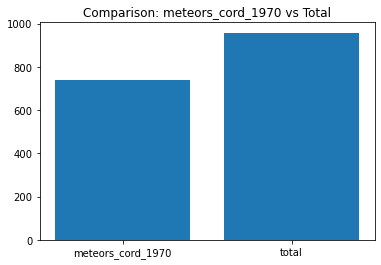

In [318]:
meteors_cord_1970 =739
total = 958

labels = ['meteors_cord_1970', 'total']
values = [meteors_cord_1970, total]


plt.bar(labels,values)


plt.title('Comparison: meteors_cord_1970 vs Total')


plt.show()

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [324]:
mass_10000=df['mass'][df['mass']>10000].count()

243

In [327]:
df['mass'].count()

959

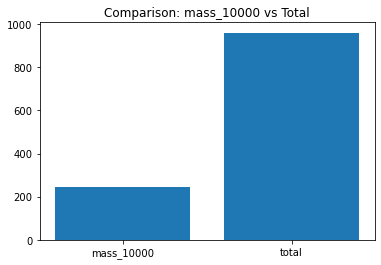

In [330]:
mass_10000 =243
total = 959

labels = ['mass_10000', 'total']
values = [mass_10000, total]


plt.bar(labels,values)


plt.title('Comparison: mass_10000 vs Total')


plt.show()

# Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

# Answer 8 .

In [331]:
df=pd.read_csv('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning\\season_description.csv')

In [335]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [342]:
season_1_rating=df['rating'][df['season']==1].apply(lambda x:eval(x)).apply(lambda x:x['average']).sum()
season_1_rating

80.9

In [343]:
season_2_rating=df['rating'][df['season']==2].apply(lambda x:eval(x)).apply(lambda x:x['average']).sum()
season_2_rating

80.0

In [344]:
season_3_rating=df['rating'][df['season']==3].apply(lambda x:eval(x)).apply(lambda x:x['average']).sum()
season_3_rating

62.2

In [345]:
season_4_rating=df['rating'][df['season']==4].apply(lambda x:eval(x)).apply(lambda x:x['average']).sum()
season_4_rating

60.3

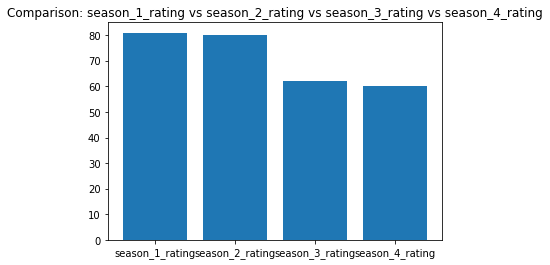

In [346]:
season_1_rating =80.9
season_2_rating= 80.0
season_3_rating=62.2
season_4_rating=60.3

labels = ['season_1_rating', 'season_2_rating','season_3_rating','season_4_rating']
values = [season_1_rating, season_2_rating,season_3_rating,season_4_rating]


plt.bar(labels,values)


plt.title('Comparison: season_1_rating vs season_2_rating vs season_3_rating vs season_4_rating')


plt.show()

2.Get all the episode names, whose average rating is more than 8 for every season

In [353]:
df['name'][df['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average'])>8.0].count()

6

In [354]:
df['name'].count()

36

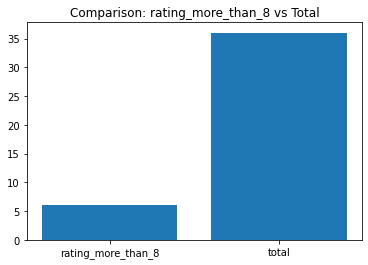

In [355]:
rating_more_than_8 =6
total = 36

labels = ['rating_more_than_8', 'total']
values = [rating_more_than_8, total]


plt.bar(labels,values)


plt.title('Comparison: rating_more_than_8 vs Total')


plt.show()

3. Get all the episode names that aired before May 2019

In [363]:
df['name'][pd.to_datetime(df['airdate'])<pd.to_datetime('2019-05-01')].count()

20

In [364]:
df['name'].count()

36

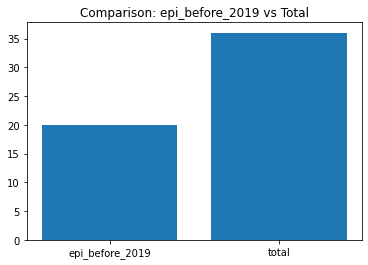

In [365]:
epi_before_2019 =20
total = 36

labels = ['epi_before_2019', 'total']
values = [epi_before_2019, total]


plt.bar(labels,values)


plt.title('Comparison: epi_before_2019 vs Total')


plt.show()

● Get the episode name from each season with the highest and lowest rating

In [380]:
df[df['season']==1]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).max()

8.7

In [381]:
df[df['season']==1]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).min()

7.6

In [382]:
df[df['season']==2]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).max()

8.7

In [383]:
df[df['season']==2]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).min()

7.6

In [384]:
df[df['season']==3]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).max()

8.0

In [385]:
df[df['season']==3]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).min()

7.5

In [386]:
df[df['season']==4]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).max()

7.8

In [387]:
df[df['season']==4]['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average']).min()

7.1

● Get the summary for the most popular ( ratings ) episode in every season

In [413]:
df['rating']=df['rating'].apply(lambda x:eval(x)).apply(lambda x:x['average'])

In [431]:
df['summary'][df['rating']==df['rating'].max()][df['season']==1]

9    <p>Delores finds out the truth about William's...
Name: summary, dtype: object

In [441]:
df[df['season']==1]['summary'][df['rating']==df[df['season']==1]['rating'].max()]

9    <p>Delores finds out the truth about William's...
Name: summary, dtype: object

In [443]:
df[df['season']==2]['summary'][df['rating']==df[df['season']==2]['rating'].max()]

17    <p>Another of Westworld's Host revolutionaries...
Name: summary, dtype: object

In [442]:
df[df['season']==3]['summary'][df['rating']==df[df['season']==3]['rating'].max()]

20    <p>If you're stuck in a loop, try walking in a...
23        <p>The truth doesn't always set you free.</p>
Name: summary, dtype: object

In [449]:
df[df['season']==4]['summary'][df['rating']==df[df['season']==4]['rating'].max()]

32    <p>God is bored.</p>
Name: summary, dtype: object

# Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after
2015

● Draw plots to show the distribution between city and electric vehicle type

# Answer 9 .

In [574]:
df=pd.read_csv('Downloads/Electric_Vehicle_Population_Data.csv')

In [493]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [565]:
df['Make'][df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range'].count()

16446

In [566]:
df['Make'].count()

130443

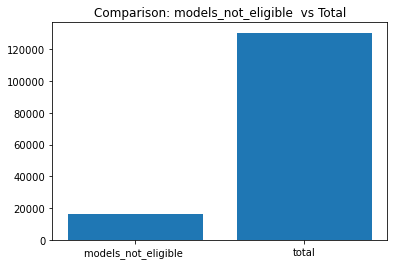

In [570]:
models_not_eligible =16446
total = 130443

labels = ['models_not_eligible ', 'total']
values = [models_not_eligible , total]


plt.bar(labels,values)


plt.title('Comparison: models_not_eligible  vs Total')


plt.show()

● Get all TESLA cars with the model year, and model type made in Bothell City.

In [541]:
df[df['City']=='Bothell City']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [545]:
'Bothell City' in df.values

False

Bothell City does not exist in this DataFrame

● Get all the cars that have an electric range of more than 100, and were made after 2015

In [568]:
df['Make'][df['Model Year']>2015][df['Electric Range'][df['Model Year']>2015]>100].count()

34066

In [569]:
df['Make'].count()

130443

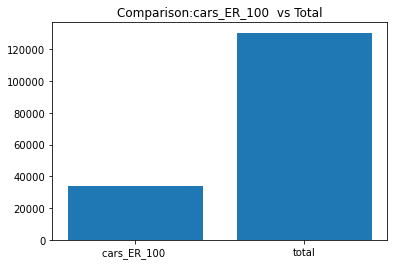

In [571]:
cars_ER_100 =34066
total = 130443

labels = ['cars_ER_100 ', 'total']
values = [cars_ER_100 , total]


plt.bar(labels,values)


plt.title('Comparison:cars_ER_100  vs Total')


plt.show()

● Draw plots to show the distribution between city and electric vehicle type

In [575]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [576]:
count_df = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

In [580]:
count_df


,City,Electric Vehicle Type,Count
0,Aberdeen,Battery Electric Vehicle (BEV),73
1,Aberdeen,Plug-in Hybrid Electric Vehicle (PHEV),42
2,Acme,Battery Electric Vehicle (BEV),3
3,Acme,Plug-in Hybrid Electric Vehicle (PHEV),4
4,Addy,Battery Electric Vehicle (BEV),1
...,...,...,...
1049,Yarrow Point,Plug-in Hybrid Electric Vehicle (PHEV),24
1050,Yelm,Battery Electric Vehicle (BEV),137
1051,Yelm,Plug-in Hybrid Electric Vehicle (PHEV),60
1052,Zillah,Battery Electric Vehicle (BEV),18


# Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.


# Answer 10 .

In [587]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [706]:
def get_speech_tags(string):
    tokens=nltk.word_tokenize(string)
    d={}
    l=[]
    tags=[]
    for word,tag in nltk.pos_tag(tokens):
        l.append(tag)
    i = 0
    while i < len(l):
        j = l[i]
        if j.startswith("P"):
            l[i] = "pronouns"
            tags.append(l[i])
            i += 1
        elif j.startswith("N"):
            l[i] = "nouns"
            tags.append(l[i])
            i += 1
        elif j.startswith("V"):
            l[i] = "verbs"
            tags.append(l[i])
            i += 1
        elif j.startswith("J"):
            l[i] = "adjectives"
            tags.append(l[i])
            i += 1
        else:
            l.remove(j)
            continue

    for i in l:
        d[i]=l.count(i)
    return d
    

In [707]:
get_speech_tags("I am adhiraj singh shekhawat and i am an student of Inueron enrolled in Data Science Course")

{'pronouns': 1, 'verbs': 3, 'adjectives': 1, 'nouns': 8}

In [708]:
get_speech_tags("I am currently working in an intership project to get a hands on industry level experience")

{'pronouns': 1, 'verbs': 3, 'nouns': 6}